# 🌊  Two-Sample Dependent t-Test | Dependent Samples t-Test
This hypothesis is used to test the comparison between the averages of two dependent groups.

**Hypotheses**

$H0 : \mu_1 = \mu_2 \quad|\quad H1 : \mu_1 \neq \mu_2$

$H0 : \mu_1 >= \mu_2 \quad |\quad H_1 : \mu_1 < \mu_2$

$H0 : \mu_1 <= \mu_2 \quad |\quad H_1 : \mu_1 > \mu_2$


**Test Statistics**

$t = \frac{\bar{d}}{s_d / \sqrt{n}}$

- $\bar{d}$: Mean of the differences  
- $s_d$: Standard deviation of the differences  
- $n$: Number of pairs  

**Assumptions:**
- Normality
- Homogeneity of variances

---


**Problem:** A manager is providing training to department employees. They want us to analyze whether the training is beneficial.

#### » Import the necessary data libraries and create arrays for pre-training and post-training simulations

In [3]:
import numpy as np
import pandas as pd
before = pd.DataFrame(np.random.normal(loc=118, scale=10, size=30).astype(int))
after = pd.DataFrame(np.random.normal(loc=130, scale=20, size=30).astype(int))

### ! Data is generally provided in two types:

#### Data Type 1

In [12]:
AB = pd.concat([before, after], axis=1)
AB.columns = ["A","B"]
AB.head()

,A,B
0,118,129
1,129,130
2,119,160
3,120,106
4,98,153


#### Data Type 2

In [13]:
group_A = pd.DataFrame(np.arange(len(before)))
group_B = pd.DataFrame(np.arange(len(after)))
group_A[group_A.columns] = "oncesi"
group_B[group_B.columns] = "sonrası"
A = pd.concat([before, group_A], axis=1)
B = pd.concat([after, group_B], axis=1)
A_B = pd.concat([A,B])
A_B.head()

,0,0
0,118,oncesi
1,129,oncesi
2,119,oncesi
3,120,oncesi
4,98,oncesi


In [14]:
A_B.tail()

,0,0
25,141,sonrası
26,144,sonrası
27,128,sonrası
28,126,sonrası
29,147,sonrası


#### » Visualize the data with boxplot to see the overall observation

<Axes: >

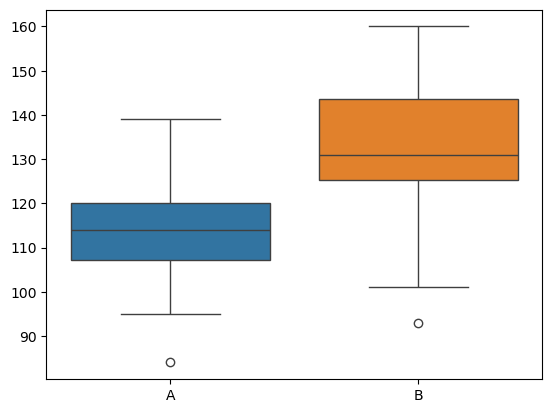

In [10]:
import seaborn as sns
sns.boxplot(AB)

### Normality Assumption
##### H0: There is no difference between the sample distribution and the theoretical normal distribution.(Normally distributed)
##### H1: There is difference "

In [16]:
from scipy.stats import shapiro
shapiro(AB.A)

ShapiroResult(statistic=np.float64(0.979095849812336), pvalue=np.float64(0.8010329327996366))

In [17]:
shapiro(AB.B)

ShapiroResult(statistic=np.float64(0.9594913198874845), pvalue=np.float64(0.30062005983156154))

Based on the results above, both A and B group's p values are greater than 0.05 so H0 can not rejected. All groups distributed normally, the assumption has been confirmed.

### Variance Homogenity Assumption
##### H0: Variances are homogen
##### H1: Variances is not homogen

In [20]:
from scipy.stats import levene
levene(AB.A, AB.B)

LeveneResult(statistic=np.float64(3.90941099021399), pvalue=np.float64(0.05277600351680727))

Based on the results above, since the pvalue is greater than 0.05, H0 can not rejected. The assumption has been confirmed.

### Hypothesis Test
##### $H0 : \mu_1 = \mu_2$ (There is no difference between pre-taining and post-training)
##### $H1 : \mu_1 \neq \mu_2$ (There is ..)

In [23]:
from scipy.stats import ttest_rel
ttest_rel(AB.A, AB.B)

TtestResult(statistic=np.float64(-4.854085663938524), pvalue=np.float64(3.805052090214106e-05), df=np.int64(29))

Based on the results above, since the pvalue lower than 0.05, H0 is rejected and thats mean There is the difference between pre-training and post-training we can say that the post-training is more useful by looking the boxplot graphs because on that graph the B's box is higher.

### ! If assumptions hadn't been confirmed, Non-parametric Two Sample Dependent Test would have been used. 

#### » Import "wilcoxon" which used for a non-parametric two sample dependent test

In [24]:
from scipy.stats import wilcoxon
wilcoxon(AB.A, AB.B)

WilcoxonResult(statistic=np.float64(50.0), pvalue=np.float64(0.0001736766107530094))